# Model Training

## 0. Setup

In [1]:
# Automatic reloading
%load_ext autoreload
%autoreload 2

In [12]:
####################
# Required Modules #
####################

# Generic/Built-in
import random
import sys 
import os

# Libs
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Get the project directory 
current_dir = os.path.abspath('') # Current '\notebooks' directory
project_dir = os.path.abspath(os.path.join(current_dir, '..')) # Move up one level to project root directory

# Add the project directory to sys.path
sys.path.append(project_dir)

# Move up to project directory
os.chdir(project_dir)
os.getcwd()

'c:\\Users\\Ryan Lee\\Desktop\\50.038 Computational Data Science\\Digital-Asset-Prediction'

In [57]:
# Import custom modules
from src.dataset import *
from src.models import *
from src.train_eval import *

In [4]:
# Seeding
SEED = 42

# To be safe, seed all modules for full reproducibility
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)  # If using CUDA
np.random.seed(SEED)
random.seed(SEED)

In [25]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## 1. Prepare Dataset

In [20]:
# Hyperparameters
CSV_PATH = "data/processed/combined_dataset_v1.csv"
INPUT_SEQUENCE_LENGTH = 14 # Number of timesteps (days) in input sequence
DATASET_STRIDE = 1
BATCH_SIZE = 128

In [21]:
# Create Dataset
dataset = CryptoDataset(
    csv_file=CSV_PATH,
    seq_length=INPUT_SEQUENCE_LENGTH,
    stride=DATASET_STRIDE
)

print("Total number of samples (sequences):", len(dataset))

Total number of samples (sequences): 107490


In [22]:
# Split into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [0.8, 0.1, 0.1])

# Create respective data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

## 2. Training
`train_model` will save model parameters to `saved_models` directory (by default).

In [ ]:
# Hyperparameters
LEARNING_RATE = 0.001 # standard for Adam
NUM_EPOCHS = 20
SAVE_INTERVAL = 5

In [53]:
model = CryptoGRU() # Using default settings
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
# Optional (load parameters)
model_path = "saved_models/CryptoTransformer_2025-04-09_21-31-23/CryptoTransformer_BEST_R2.pth"
# model.load_state_dict(torch.load(model_path))

In [54]:
training_loss_history, validation_loss_history, mae_history, r2_history, normalizer = train_model(
    model, optimizer, train_loader, val_loader,
    num_epochs=NUM_EPOCHS, save_interval=SAVE_INTERVAL,
    device=device
)

Epoch [1/15] | Time: 28.38s
(Training) Loss: 214086.4793
(Validation) Loss: 245604.0259, MAE: 685.2863, R2: -0.0132
✅ Model saved: saved_models\CryptoGRU_2025-04-09_22-08-04\CryptoGRU_BEST_R2.pth
Epoch [2/15] | Time: 28.73s
(Training) Loss: 213754.8699
(Validation) Loss: 245091.6299, MAE: 673.5078, R2: -0.0117
✅ Model saved: saved_models\CryptoGRU_2025-04-09_22-08-04\CryptoGRU_BEST_R2.pth
Epoch [3/15] | Time: 27.39s
(Training) Loss: 213536.4077
(Validation) Loss: 244798.4641, MAE: 670.8036, R2: -0.0102
✅ Model saved: saved_models\CryptoGRU_2025-04-09_22-08-04\CryptoGRU_BEST_R2.pth
Epoch [4/15] | Time: 28.31s
(Training) Loss: 213133.3542
(Validation) Loss: 244476.9252, MAE: 666.9100, R2: -0.0087
✅ Model saved: saved_models\CryptoGRU_2025-04-09_22-08-04\CryptoGRU_BEST_R2.pth
Epoch [5/15] | Time: 28.70s
(Training) Loss: 212844.4660
(Validation) Loss: 244049.3504, MAE: 663.6702, R2: -0.0073
✅ Model saved: saved_models\CryptoGRU_2025-04-09_22-08-04\CryptoGRU_BEST_R2.pth
✅ Model saved: saved

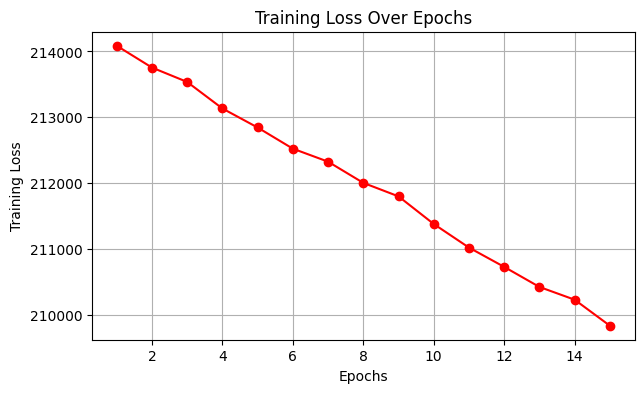

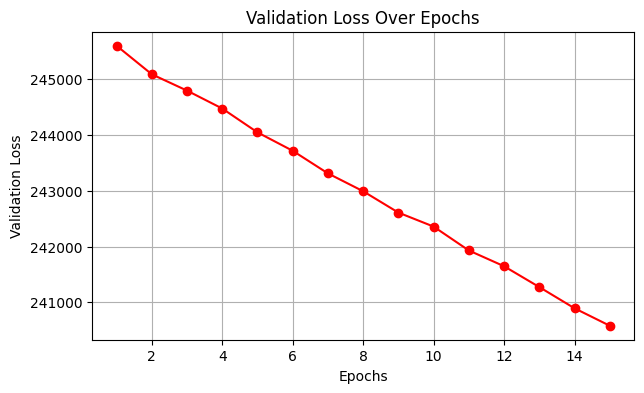

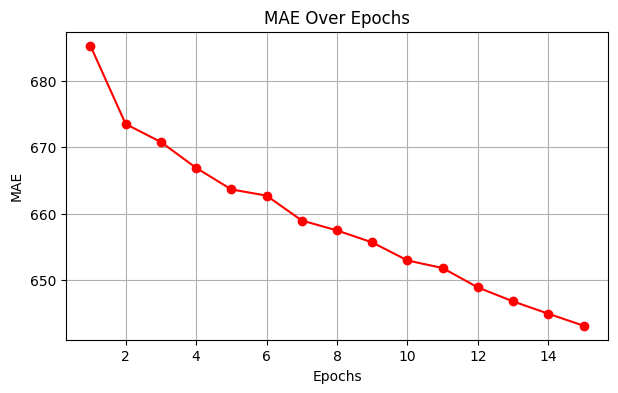

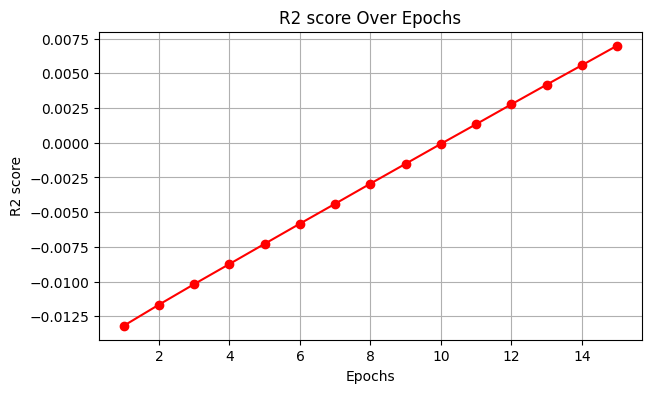

✅ Plots saved to: results\CryptoGRU_2025-04-09_22-37-55
✅ Metric histories saved to: results\CryptoGRU_2025-04-09_22-37-55\metric_histories.pth


In [58]:
save_training_plots_and_metric_history(
    training_loss_history, validation_loss_history, mae_history, r2_history, type(model).__name__
)

## 3. Test

In [55]:
final_evaluation_loss, final_mae, final_r2 = evaluate_crypto_model(model, test_loader, normalizer)
print(f"Loss: {final_evaluation_loss:.4f}, MAE: {final_mae:.4f}, R2: {final_r2:.4f}")

Loss: 194049.5673, MAE: 545.6884, R2: 0.0096
